In [2]:
import networkx as nx
%matplotlib inline
from random import randrange as rr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv("data/wtf.csv")
df['sitc4'] = df['sitc4'].astype(str)
del df['Unnamed: 0']

gdf = df.groupby(["sitc4","exporter"]).sum().reset_index()
gdf = gdf[['sitc4','exporter','value']]

rca_df = pd.read_csv("data/rca.csv")
del rca_df['Unnamed: 0']
rca_df = rca_df.dropna(subset=['sitc4', 'exporter'])

In [88]:
rca_treshold = 1
mcp = rca_df[rca_df.rca >= rca_treshold]
mcp;

In [89]:
products = list(rca_df.sitc4.unique())
countries = list(rca_df.exporter.unique())

# Random Matrix

In [93]:
#Number of Capabilities
N_a = 200
#Probability that country has capability
r=0.7
#Probabilty that product needs capability 
q=0.05

# Create Country Capabilities Matrix
C_ca=np.zeros((len(countries),N_a))

for i in range(len(countries)):
    for j in range(N_a):
        C_ca[i][j]=np.random.choice([0,1],p =[1-r, r]) 

# Create Product Required Capabilities
P_pa=np.zeros((len(products),N_a))

for i in range(len(products)):
    for j in range(N_a):
        P_pa[i][j]=np.random.choice([0,1],p =[1-q, q]) 


# $M_{cp}$

In [95]:
M_cp=np.zeros((len(countries),len(products)))

for i in range(len(countries)):
    for j in range(len(products)):
        sum_r = 0
        sum_l = 0
        for k in range(N_a):
            sum_r += P_pa.item((j, k))*C_ca.item((i, k))
        for k in range(N_a):
            sum_l += P_pa.item((j, k))

        if sum_l == sum_r:
            M_cp[i][j] = 1
                

M_cp






array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## Draw Matrix

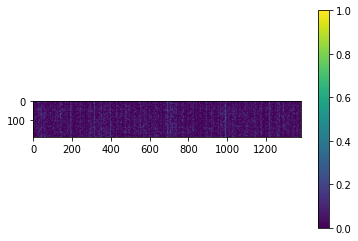

In [96]:
plt.imshow(M_cp)
plt.colorbar()
plt.show()

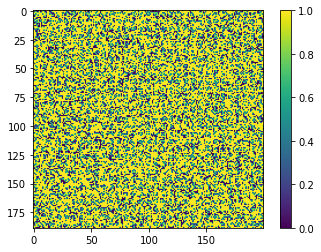

In [97]:
plt.imshow(C_ca)
plt.colorbar()
plt.show()

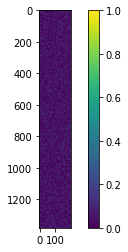

In [99]:
plt.imshow(P_pa)
plt.colorbar()
plt.show()